# TensorFlow vs PyTorch

##Downloading the dataset

In [ ]:
!pip install opendatasets --upgrade --quiet

In [ ]:
# The opendatasets library allows us to easily download a kaggle dataset.
import opendatasets as od

dataset_url = "https://www.kaggle.com/datasets/ruopengan/11-common-nut-types-for-image-classification"
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: joekanaan
Your Kaggle Key: ··········


100%|██████████| 4.36G/4.36G [02:04<00:00, 37.6MB/s]


## Looking at the dataset

In [ ]:
import os

In [ ]:
os.listdir("/content/11-common-nut-types-for-image-classification")

['Nuts Splits-20220710T144104Z-001', 'Nuts']

In [ ]:
os.listdir("/content/11-common-nut-types-for-image-classification/Nuts Splits-20220710T144104Z-001/Nuts Splits/train")

['Peanut',
 'Pecan',
 'Pine Nut',
 'Macadamia',
 'Hazelnut',
 'Cashew',
 'Almond',
 'Brazil Nut',
 'Chestnut']

In [ ]:
len(os.listdir("/content/11-common-nut-types-for-image-classification/Nuts Splits-20220710T144104Z-001/Nuts Splits/train"))

9

In [ ]:
len(os.listdir("/content/11-common-nut-types-for-image-classification/Nuts Splits-20220710T144104Z-001/Nuts Splits/train/Peanut"))

120

In [ ]:
os.listdir("/content/11-common-nut-types-for-image-classification/Nuts")

['Nuts']

In [ ]:
os.listdir("/content/11-common-nut-types-for-image-classification/Nuts/Nuts")

['val', 'train', 'test']

In [ ]:
os.listdir("/content/11-common-nut-types-for-image-classification/Nuts/Nuts/train")

['Peanut',
 'Pecan',
 'Pine Nut',
 'Walnut',
 'Macadamia',
 'Pistachio',
 'Hazelnut',
 'Cashew',
 'Almond',
 'Brazil Nut',
 'Chestnut']

In [ ]:
len(os.listdir("/content/11-common-nut-types-for-image-classification/Nuts/Nuts/train"))

11

In [ ]:
len(os.listdir("/content/11-common-nut-types-for-image-classification/Nuts/Nuts/train/Peanut"))

120

In [ ]:
len(os.listdir("/content/11-common-nut-types-for-image-classification/Nuts/Nuts/train/Walnut"))

120

In [ ]:
len(os.listdir("/content/11-common-nut-types-for-image-classification/Nuts/Nuts/val/Walnut"))

40

In [ ]:
len(os.listdir("/content/11-common-nut-types-for-image-classification/Nuts/Nuts/test/Walnut"))

40

So the folder contains two directories. These two directories have a train, val and test folders. And the only difference is the number of classes. One folder contains 9 classes while the other contains 11. They are both split in the same way 60/20/20 for train/val/test. And are balanced.

## PyTorch

### Preparing the data

In [ ]:
# Getting all the paths
data_dir = "/content/11-common-nut-types-for-image-classification/Nuts/Nuts"

train_dir = data_dir + "/train"
val_dir = data_dir + "/val"
test_dir = data_dir + "/test"

In [ ]:
# Importing the libraries
import torch
import torchvision
from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder
import torchvision.transforms as T

In [ ]:
# Create the dataset without any transforms
train_ds = ImageFolder(train_dir)

In [ ]:
# Get the length of the dataset
len(train_ds)

1320

(-0.5, 4031.5, 3023.5, -0.5)

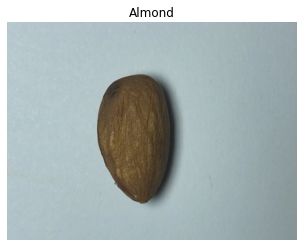

In [ ]:
# Visualize the data
import matplotlib.pyplot as plt

image, label = train_ds[0]
plt.imshow(image)
plt.title(train_ds.classes[label])
plt.axis(False)

Can't get the shape since it's not a Tensor


image.shape will give an error

In [ ]:
# Create the dataset with a ToTensor() transformation
train_ds = ImageFolder(train_dir, transform = T.ToTensor())

In [ ]:
image, label = train_ds[0]
image.shape

torch.Size([3, 3024, 4032])

(-0.5, 4031.5, 3023.5, -0.5)

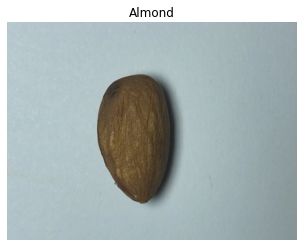

In [ ]:
# We need to permute the image since matplolib takes Width, Height, Channel
plt.imshow(image.permute(1, 2, 0))
plt.title(train_ds.classes[label])
plt.axis(False)

(-0.5, 4031.5, 3023.5, -0.5)

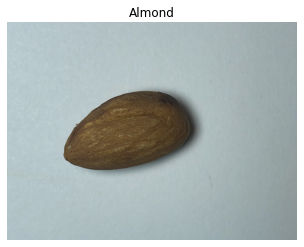

In [ ]:
image, label = train_ds[1]
plt.imshow(image.permute(1, 2, 0))
plt.title(train_ds.classes[label])
plt.axis(False)

In [ ]:
image.shape

torch.Size([3, 3024, 4032])

(-0.5, 4031.5, 3023.5, -0.5)

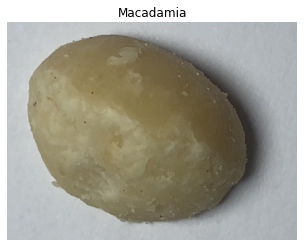

In [ ]:
image, label = train_ds[645]
plt.imshow(image.permute(1, 2, 0))
plt.title(train_ds.classes[label])
plt.axis(False)

In [ ]:
image.shape

torch.Size([3, 3024, 4032])

This shows that all images have the same shapes and we can choose not to resize them. But the training process will be slower if we don't because the images are very large.

In [ ]:
# Let's try keeping the dataset as it is without augmentation.
train_ds = ImageFolder(train_dir, transform = T.Compose([T.Resize(size = (224, 224)), T.ToTensor()]))
val_ds = ImageFolder(val_dir, transform = T.Compose([T.Resize(size = (224, 224)), T.ToTensor()]))
test_ds = ImageFolder(test_dir, transform = T.Compose([T.Resize(size = (224, 224)), T.ToTensor()]))

In [ ]:
len(train_ds), len(val_ds), len(test_ds)

(1320, 440, 440)

In [ ]:
# Let's create the DataLoaders
train_dl = DataLoader(train_ds, batch_size = 64, shuffle = True)
val_dl = DataLoader(val_ds, batch_size = 64, shuffle = True)
test_dl = DataLoader(test_ds, batch_size = 64, shuffle = True)

images.shape: torch.Size([64, 3, 224, 224])


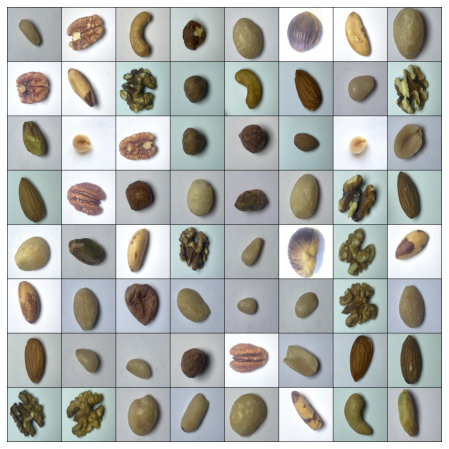

In [ ]:
# Looking at a batch of data
from torchvision.utils import make_grid

for images, _ in train_dl:
    print('images.shape:', images.shape)
    plt.figure(figsize=(16,8))
    plt.axis('off')
    plt.imshow(make_grid(images, nrow=8).permute((1, 2, 0)))
    break

### Using a GPU

In [ ]:
def get_default_device():
    """Pick GPU if available, else CPU"""
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')
    
def to_device(data, device):
    """Move tensor(s) to chosen device"""
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

class DeviceDataLoader():
    """Wrap a dataloader to move data to a device"""
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device
        
    def __iter__(self):
        """Yield a batch of data after moving it to device"""
        for b in self.dl: 
            yield to_device(b, self.device)

    def __len__(self):
        """Number of batches"""
        return len(self.dl)

In [ ]:
# Get the default device
device = get_default_device()
device

device(type='cuda')

In [ ]:
# Move the dataloaders to the GPU
train_dl = DeviceDataLoader(train_dl, device)
val_dl = DeviceDataLoader(val_dl, device)
test_dl = DeviceDataLoader(test_dl, device)

In [ ]:
# Check the shape
for images, labels in train_dl:
  print(images.shape)
  break

torch.Size([64, 3, 224, 224])


### Create a model

In [ ]:
# We will use a pretrained model. And use transfer learning to fine tune the model for our own use case.
from torchvision import models

model = models.resnet18(pretrained = True)

/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

In [ ]:
model

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

### Create the training loop

In [ ]:
import time
import copy

dataloaders = {"train" : train_dl, "val" : val_dl}
dataset_sizes = {"train" : len(train_dl), "val" : len(val_dl)}

def train_model(model, criterion, optimizer, scheduler, num_epochs=25):
    since = time.time()

    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch, num_epochs - 1))
        print('-' * 10)

        # Each epoch has a training and validation phase
        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()  # Set model to training mode
            else:
                model.eval()   # Set model to evaluate mode

            running_loss = 0.0
            running_corrects = 0

            # Iterate over data.
            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device)

                # forward
                # track history if only in train
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    # backward + optimize only if in training phase
                    if phase == 'train':
                        optimizer.zero_grad()
                        loss.backward()
                        optimizer.step()

                # statistics
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

            if phase == 'train':
                scheduler.step()

            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_sizes[phase]

            print('{} Loss: {:.4f} Acc: {:.4f}'.format(
                phase, epoch_loss, epoch_acc))

            # deep copy the model
            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())

        print()

    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(
        time_elapsed // 60, time_elapsed % 60))
    print('Best val Acc: {:4f}'.format(best_acc))

    # load best model weights
    model.load_state_dict(best_model_wts)
    return model

### Train the model

In [ ]:
# Freeze all the layers of the model
for param in model.parameters():
  param.requires_grad = False

# Import the torch.nn module
import torch.nn as nn

# Get the number of features of the last input layer
num_ftrs = model.fc.in_features

# Replace the last layer with a fully connected Linear layer with the same number of inputs but change the outputs
model.fc = nn.Linear(num_ftrs, len(train_ds.classes))

# Move the model to the GPU
model.to(device)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

Since we freezed all the layers by setting requires grad to False. We can replace the last layer by a new one that has 11 outputs. This final layer will have requires grad set to True by default. So we are ready to fine tune the model for a few epochs now!

In [ ]:
# Define the loss function and the optimizer and the schedular
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.fc.parameters(), lr=0.01, momentum=0.9)
schedular = torch.optim.lr_scheduler.StepLR(optimizer, step_size=3, gamma=0.1)

In [ ]:
# Train the model
model = train_model(model, criterion, optimizer, schedular, num_epochs = 5)

Epoch 0/4
----------
train Loss: 74.8492 Acc: 41.0952
val Loss: 29.1157 Acc: 54.7143

Epoch 1/4
----------
train Loss: 8.6396 Acc: 61.1905
val Loss: 8.6153 Acc: 60.5714

Epoch 2/4
----------
train Loss: 4.5160 Acc: 62.1429
val Loss: 4.6582 Acc: 62.0000

Epoch 3/4
----------
train Loss: 3.4635 Acc: 62.5238
val Loss: 4.4732 Acc: 62.0000

Epoch 4/4
----------
train Loss: 3.4364 Acc: 62.4762
val Loss: 4.1422 Acc: 62.1429

Training complete in 28m 18s
Best val Acc: 62.142857


In [ ]:
# Unfreeze the model
for param in model.parameters():
  param.requires_grad = True

# Train the whole model 
model = train_model(model, criterion, optimizer, schedular, num_epochs = 5)

Epoch 0/4
----------
train Loss: 3.2434 Acc: 62.5714
val Loss: 4.0652 Acc: 62.1429

Epoch 1/4
----------
train Loss: 3.0027 Acc: 62.6667
val Loss: 4.0758 Acc: 62.1429

Epoch 2/4
----------
train Loss: 3.1902 Acc: 62.6667
val Loss: 4.0135 Acc: 62.1429

Epoch 3/4
----------
train Loss: 3.2162 Acc: 62.6190
val Loss: 4.0581 Acc: 62.1429

Epoch 4/4
----------
train Loss: 3.2167 Acc: 62.6667
val Loss: 4.0936 Acc: 62.1429

Training complete in 28m 0s
Best val Acc: 62.142857


## TensorFlow

### Preparing the data

In [ ]:
# Getting all the paths
data_dir = "/content/11-common-nut-types-for-image-classification/Nuts/Nuts"

train_dir = data_dir + "/train"
val_dir = data_dir + "/val"
test_dir = data_dir + "/test"

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
# Define some parameters
BATCH_SIZE = 64
IMG_SHAPE = 224

# Create an image generator which will normalize the data
image_gen = ImageDataGenerator(rescale = 1/255.)

# Create the train, val and test generators
train_gen = image_gen.flow_from_directory(train_dir,
                                          shuffle = True,
                                          batch_size = BATCH_SIZE,
                                          target_size = (IMG_SHAPE, IMG_SHAPE),
                                          class_mode = "sparse")

val_gen = image_gen.flow_from_directory(val_dir,
                                        batch_size = BATCH_SIZE,
                                        target_size = (IMG_SHAPE, IMG_SHAPE),
                                        class_mode = "sparse")

test_gen = image_gen.flow_from_directory(test_dir,
                                         batch_size = BATCH_SIZE,
                                         target_size = (IMG_SHAPE, IMG_SHAPE),
                                         class_mode = "sparse")

Found 1320 images belonging to 11 classes.
Found 440 images belonging to 11 classes.
Found 440 images belonging to 11 classes.


### Creating the model

In [ ]:
# Get a base model with the last layer removed
base_model = tf.keras.applications.ResNet50(include_top = False)

In [ ]:
# Freeze all the layers in the model
base_model.trainable = False

In [ ]:
# Define the input layer
inputs = tf.keras.layers.Input(shape = (224, 224, 3), name = "input_layer")

In [ ]:
# Pass the input layer through the model
x = base_model(inputs, training = False)

print(f"The shape after passing through the base model: {x.shape}")

The shape after passing through the base model: (None, 7, 7, 2048)


In [ ]:
# Pass x into a GlobalAverage Pooling layer
x = tf.keras.layers.GlobalAveragePooling2D(name = "average_pooling_layer")(x)

print(f"The shape after passing through the average pooling layer: {x.shape}")

The shape after passing through the average pooling layer: (None, 2048)


In [ ]:
# Define an output layer
outputs = tf.keras.layers.Dense(11, activation = "softmax", name = "output_layer")(x)

In [ ]:
# Create the model
model = tf.keras.Model(inputs, outputs)

In [ ]:
# Get the model details
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 resnet50 (Functional)       (None, None, None, 2048)  23587712  
                                                                 
 average_pooling_layer (Glob  (None, 2048)             0         
 alAveragePooling2D)                                             
                                                                 
 output_layer (Dense)        (None, 11)                22539     
                                                                 
Total params: 23,610,251
Trainable params: 22,539
Non-trainable params: 23,587,712
_________________________________________________________________


In [ ]:
# Compile the model
model.compile(loss = "sparse_categorical_crossentropy",
              optimizer = "adam",
              metrics = ["accuracy"])

In [ ]:
EPOCHS = 5

# Fit the model
history = model.fit(train_gen, 
                    steps_per_epoch = len(train_gen),
                    epochs = EPOCHS,
                    validation_data = val_gen,
                    validation_steps = len(val_gen))

Epoch 1/5
21/21 [==============================] - 264s 12s/step - loss: 2.4452 - accuracy: 0.0939 - val_loss: 2.4103 - val_accuracy: 0.0909
Epoch 2/5
21/21 [==============================] - 243s 12s/step - loss: 2.3986 - accuracy: 0.0902 - val_loss: 2.3728 - val_accuracy: 0.1045
Epoch 3/5
21/21 [==============================] - 242s 12s/step - loss: 2.3685 - accuracy: 0.1409 - val_loss: 2.3597 - val_accuracy: 0.0909
Epoch 4/5
21/21 [==============================] - 242s 12s/step - loss: 2.3457 - accuracy: 0.1598 - val_loss: 2.3213 - val_accuracy: 0.2273
Epoch 5/5
21/21 [==============================] - 243s 12s/step - loss: 2.3267 - accuracy: 0.1682 - val_loss: 2.3139 - val_accuracy: 0.1705


In [ ]:
# What layers in the model are trainable?
for layer in model.layers:
  print(layer.name, layer.trainable)

input_layer True
resnet50 False
average_pooling_layer True
output_layer True


In [ ]:
# Make all the layers in the model trainable
model.trainable = True

for layer in model.layers:
  print(layer.name, layer.trainable)

input_layer True
resnet50 True
average_pooling_layer True
output_layer True


In [ ]:
# Fit the unfrozen model
history = model.fit(train_gen, 
                    steps_per_epoch = len(train_gen),
                    epochs = EPOCHS,
                    validation_data = val_gen,
                    validation_steps = len(val_gen))

Epoch 1/5
21/21 [==============================] - 251s 12s/step - loss: 2.3017 - accuracy: 0.2015 - val_loss: 2.2898 - val_accuracy: 0.1795
Epoch 2/5
21/21 [==============================] - 242s 12s/step - loss: 2.2874 - accuracy: 0.1992 - val_loss: 2.2653 - val_accuracy: 0.2205
Epoch 3/5
21/21 [==============================] - 242s 12s/step - loss: 2.2685 - accuracy: 0.1886 - val_loss: 2.2415 - val_accuracy: 0.2955
Epoch 4/5
21/21 [==============================] - 241s 12s/step - loss: 2.2529 - accuracy: 0.2061 - val_loss: 2.2459 - val_accuracy: 0.2386
Epoch 5/5
21/21 [==============================] - 244s 12s/step - loss: 2.2394 - accuracy: 0.2606 - val_loss: 2.2178 - val_accuracy: 0.1864
